In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
iris = load_iris()
X = iris.data
y = iris.target

feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)

print("Original Dataset Shape:", df.shape)
df.head()

Original Dataset Shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Reduced Dataset Shape:", X_pca.shape)


Reduced Dataset Shape: (150, 2)


In [13]:
pca_df = pd.DataFrame(
    X_pca,
    columns=['Principal Component 1', 'Principal Component 2']
)

pca_df['Target'] = y

print(pca_df.head())

   Principal Component 1  Principal Component 2  Target
0              -2.264703               0.480027       0
1              -2.080961              -0.674134       0
2              -2.364229              -0.341908       0
3              -2.299384              -0.597395       0
4              -2.389842               0.646835       0


In [5]:
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

print("\nTotal Variance Explained:",
      sum(pca.explained_variance_ratio_))


Explained Variance Ratio:
[0.72962445 0.22850762]

Total Variance Explained: 0.9581320720000164


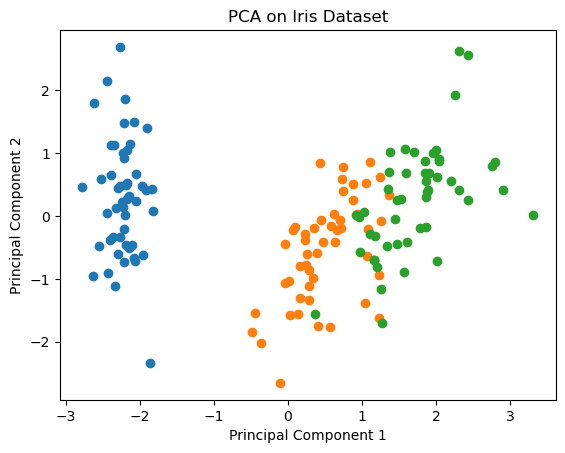

In [7]:
plt.figure()

for target in np.unique(y):
    plt.scatter(
        pca_df[pca_df['Target'] == target]['Principal Component 1'],
        pca_df[pca_df['Target'] == target]['Principal Component 2']
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.show()